In [23]:
####### Import #######
from sklearn.datasets import fetch_openml
from sklearn import model_selection
from sklearn import neighbors
import sklearn
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import time
import statistics

In [2]:
####### Loading data #######
mnist = fetch_openml('mnist_784',as_frame=False)

In [3]:
### Create vector of 5000 random indexes
rand_indexes = np.random.randint(70000, size=5000)
### Load data with the previous vector
data = mnist.data[rand_indexes]
print("Dataset : ", data)
target = mnist.target[rand_indexes]
print("Etiquettes : ", target)

### Split the dataset for training and testing
# xtrain data set d'entraînement et ytrain étiquettes de xtrain
# xtest dataset de prédiction et ytest étiquettes de xtest
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, target,train_size=0.8)

# On entraîne avec k = 10
n_neighbors = 10
clf = neighbors.KNeighborsClassifier(n_neighbors)
# Training with xtrain,ytrain
clf.fit(xtrain, ytrain)
# Predicting with xtest
pred = clf.predict(xtest)
print("Prédiction : ", pred)
# Predicting probabilities with xtest
pred_proba = clf.predict_proba(xtest)
print("Probabilités : ", pred_proba)
# Computing the score with xtest,ytest
score = clf.score(xtest, ytest)
print("Classe image 4 : ", target[3])
print("Classe prédite image 4 : ", pred[3])
print("Score échantillon de test : ", score)
scoreApp = clf.score(xtrain, ytrain)
print("Score données apprentissage : ", scoreApp)

Dataset :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Etiquettes :  ['8' '2' '9' ... '5' '2' '8']
Prédiction :  ['4' '2' '3' '0' '5' '0' '3' '8' '5' '4' '7' '6' '6' '2' '2' '1' '0' '3'
 '0' '2' '6' '7' '1' '3' '8' '2' '8' '3' '8' '0' '9' '6' '7' '7' '4' '3'
 '4' '8' '6' '9' '8' '8' '3' '2' '6' '3' '4' '2' '1' '2' '7' '1' '0' '6'
 '3' '8' '5' '9' '3' '2' '2' '2' '5' '6' '1' '7' '5' '7' '2' '3' '8' '5'
 '1' '7' '6' '7' '8' '7' '4' '0' '3' '8' '7' '1' '4' '3' '3' '2' '2' '3'
 '1' '1' '0' '6' '3' '9' '1' '0' '7' '5' '6' '2' '1' '0' '2' '5' '9' '2'
 '5' '1' '9' '7' '4' '8' '4' '4' '7' '5' '0' '0' '7' '6' '7' '3' '2' '1'
 '5' '3' '5' '8' '5' '1' '7' '0' '2' '8' '8' '3' '5' '1' '5' '0' '0' '6'
 '0' '5' '3' '4' '3' '9' '7' '3' '5' '5' '5' '7' '2' '0' '5' '3' '5' '8'
 '3' '6' '2' '6' '1' '3' '2' '3' '3' '7' '3' '4' '3' '0' '4' '5' '1' '5'
 '1' '7' '6' '1' '0' '2' '6' '5' '3' '3' '1' 

In [33]:
####### Variation du nombre k de voisins #######

### Create vector of 5000 random indexes
rand_indexes = np.random.randint(70000, size=5000)
### Load data with the previous vector
data = mnist.data[rand_indexes]
# print("Dataset : ", data)
target = mnist.target[rand_indexes]
# print("Etiquettes : ", target)

### Split the data in 10 chunks
kf = KFold(n_splits=10, random_state=None, shuffle=True)

# Initialisation des métriques
all_scores = []
k_scores = []
all_times = []
k_times = []

# Fais varier le nombre de voisins de 2 à 15
for k in range(2,16):
    print("Computing for k =", k)
    k_scores = []
    k_times = []
    # Boucle sur chaque paire de jeu de données entraînement/test
    for train_index, test_index in kf.split(data):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = target[train_index], target[test_index]
        
        t1 = round(time.time(),3)
        clf = neighbors.KNeighborsClassifier(k)
        # On entraîne l'algorithme sur xtrain et ytrain
        clf.fit(X_train, y_train)
        t2 = round(time.time(),3)
        # On prédit sur xtest
        pred = clf.predict(X_test)
        # Probabilités des prédictions sur xtest
        pred_proba = clf.predict_proba(X_test)
        # On calcule le score obtenu sur xtest avec les étiquettes ytest
        # et l'ajoute à la liste des scores
        k_scores.append(clf.score(X_test, y_test))
        k_times.append(t2-t1)
    all_scores.append(k_scores)
    all_times.append(k_times)
print("Done")

Computing for k = 2
Computing for k = 3
Computing for k = 4
Computing for k = 5
Computing for k = 6
Computing for k = 7
Computing for k = 8
Computing for k = 9
Computing for k = 10
Computing for k = 11
Computing for k = 12
Computing for k = 13
Computing for k = 14
Computing for k = 15
2  :  0.9186000000000001
3  :  0.9294
4  :  0.9268000000000001
5  :  0.926
6  :  0.925
7  :  0.9236
8  :  0.9244
9  :  0.9232
10  :  0.922
11  :  0.921
12  :  0.9198000000000001
13  :  0.9194
14  :  0.9176000000000001
15  :  0.919


Text(108.0, 0.5, 'Times')

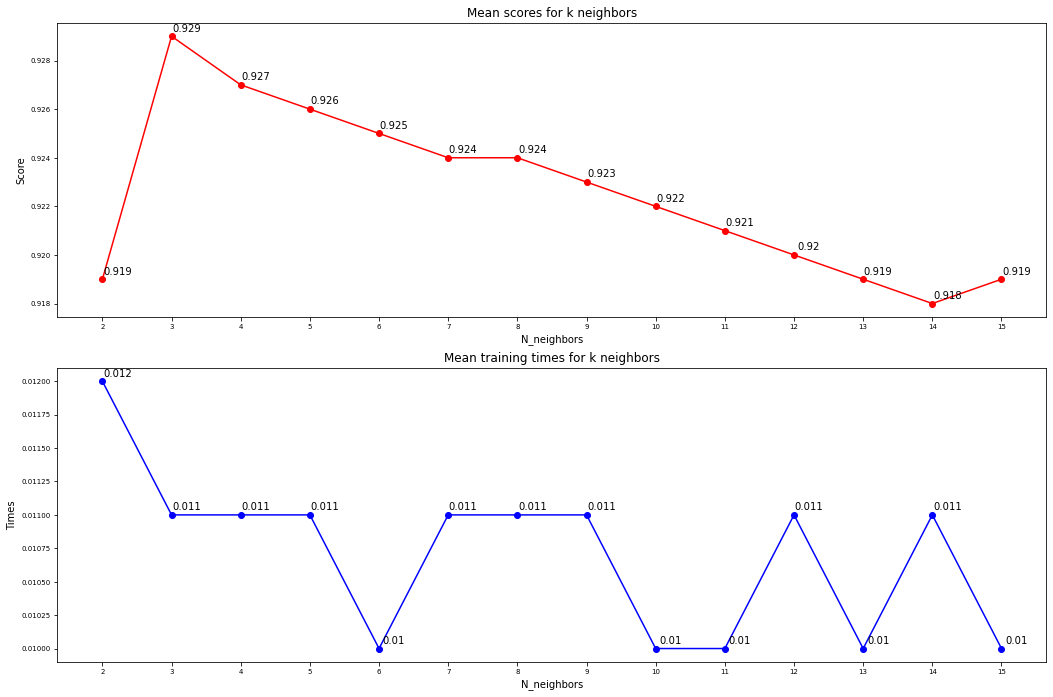

In [72]:
##### x coordinates
x = np.arange(2,16,1)
mean_scores = []
mean_times = []
for i in range(len(all_scores)):
    mean_scores += [round(statistics.mean(all_scores[i]),3)]
    mean_times += [round(statistics.mean(all_times[i]),3)]
mean_scores = np.float64(mean_scores)
mean_times = np.float64(mean_times)

### Create plot
fig, figs = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
fig.tight_layout(pad=3.0)
figs[0].plot(x,mean_scores, marker='o', color='r')
figs[1].plot(x,mean_times, marker='o', color='b')
### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(mean_scores[i], # this is the text
                 (x[i],mean_scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(mean_times[i], # this is the text
                 (x[i],mean_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Mean scores for k neighbors')
figs[1].title.set_text('Mean training times for k neighbors')
figs[0].set_xlabel('N_neighbors')
figs[1].set_xlabel('N_neighbors')
figs[0].set_ylabel('Score')
figs[1].set_ylabel('Times')

In [108]:
####### Variation du pourcentage des échantillons #######

### Create vector of 5000 random indexes
rand_indexes = np.random.randint(70000, size=5000)
### Load data with the previous vector
data = mnist.data[rand_indexes]
# print("Dataset : ", data)
target = mnist.target[rand_indexes]
# print("Etiquettes : ", target)

scores = []
training_times = []
prediction_times = []

### Train the algorithm with various percentage of the dataset used for training
### from 10% to 90% by 10% increment
for j in range (1, 10):
    print("Computing for j =", j*10, "%")
    # Split the dataset
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, target,train_size=(j/10))
    
    # Training on xtrain,ytrain
    t1 = round(time.time(),3)
    clf = neighbors.KNeighborsClassifier(n_neighbors=3)
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),3)
    
    # Predicting on xtest
    pred = clf.predict(xtest)
    t3 = round(time.time(),3)
    training_times.append(round(t2-t1,3))
    prediction_times.append(round(t3-t2,3))
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On calcule le score obtenu sur xtest avec les étiquettes ytest
    scores.append(round(clf.score(xtest, ytest),3))

Computing for j = 10 %
Computing for j = 20 %
Computing for j = 30 %
Computing for j = 40 %
Computing for j = 50 %
Computing for j = 60 %
Computing for j = 70 %
Computing for j = 80 %
Computing for j = 90 %


training_times : 
 [0.028, 0.003, 0.004, 0.004, 0.005, 0.006, 0.007, 0.008, 0.013]
prediction_times : 
 [0.252, 0.248, 0.262, 0.242, 0.242, 0.232, 0.18, 0.171, 0.081]


Text(108.0, 0.5, 'Times(in ms)')

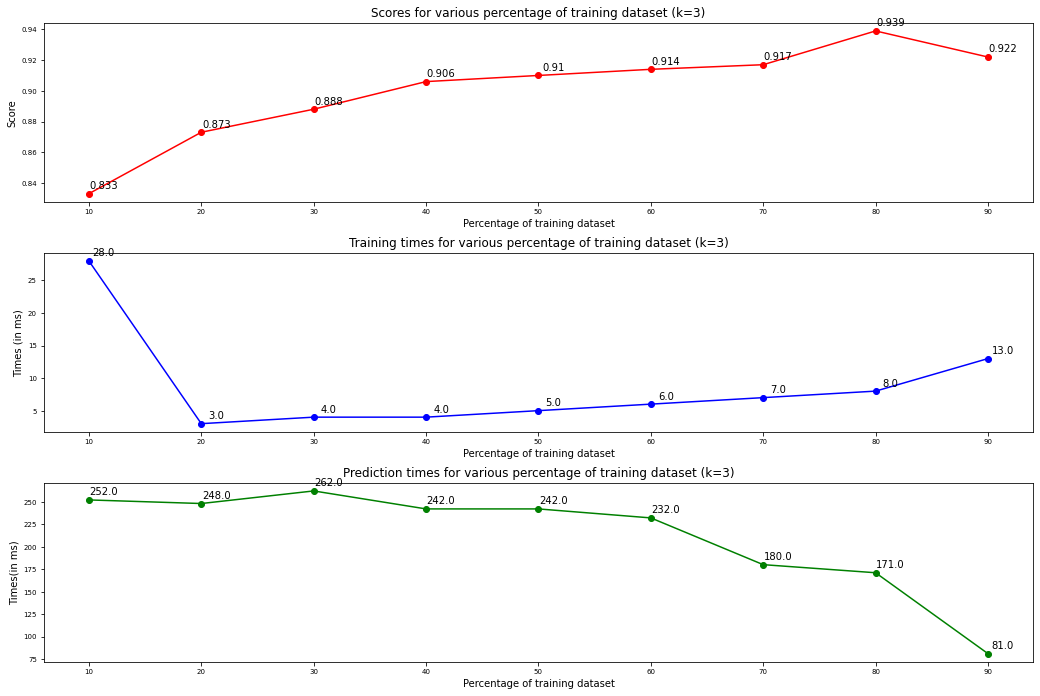

In [109]:
##### x coordinates
x = np.arange(10,100,10)
print("training_times : \n", training_times)
print("prediction_times : \n", prediction_times)

training_times = [i*1000 for i in training_times]
prediction_times = [i*1000 for i in prediction_times]

### Create plot
fig, figs = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
fig.tight_layout(pad=3.0)
figs[0].plot(x,scores, marker='o', color='r')
figs[1].plot(x,training_times, marker='o', color='b')
figs[2].plot(x,prediction_times, marker='o', color='g')
### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[2].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(scores[i], # this is the text
                 (x[i],scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(training_times[i], # this is the text
                 (x[i],training_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[2].annotate(prediction_times[i], # this is the text
                 (x[i],prediction_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
figs[2].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Scores for various percentage of training dataset (k=3)')
figs[1].title.set_text('Training times for various percentage of training dataset (k=3)')
figs[2].title.set_text('Prediction times for various percentage of training dataset (k=3)')
figs[0].set_xlabel('Percentage of training dataset')
figs[1].set_xlabel('Percentage of training dataset')
figs[2].set_xlabel('Percentage of training dataset')
figs[0].set_ylabel('Score')
figs[1].set_ylabel('Times (in ms)')
figs[2].set_ylabel('Times(in ms)')

In [104]:
####### Variation de la taille de l'échantillon #######
scores = []
training_times = []
prediction_times = []

for i in range (1,14):
    print("Computing for taille échantillon = ", i*5000, " données")
    ### Create vector of 5000 random indexes
    rand_indexes = np.random.randint(70000, size=i*5000)
    ### Load data with the previous vector
    data = mnist.data[rand_indexes]
    target = mnist.target[rand_indexes]

    # Split the dataset
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, target,train_size=(0.9))

    # Training on xtrain,ytrain
    t1 = round(time.time(),3)
    clf = neighbors.KNeighborsClassifier(n_neighbors=3)
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),3)

    # Predicting on xtest
    pred = clf.predict(xtest)
    t3 = round(time.time(),3)
    training_times.append(round(t2-t1,3))
    prediction_times.append(round(t3-t2,3))
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On calcule le score obtenu sur xtest avec les étiquettes ytest
    scores.append(round(clf.score(xtest, ytest),3))

Computing for taille échantillon =  5000  données
Computing for taille échantillon =  10000  données
Computing for taille échantillon =  15000  données
Computing for taille échantillon =  20000  données
Computing for taille échantillon =  25000  données
Computing for taille échantillon =  30000  données
Computing for taille échantillon =  35000  données
Computing for taille échantillon =  40000  données
Computing for taille échantillon =  45000  données
Computing for taille échantillon =  50000  données
Computing for taille échantillon =  55000  données
Computing for taille échantillon =  60000  données
Computing for taille échantillon =  65000  données


Text(108.0, 0.5, 'Times(in ms)')

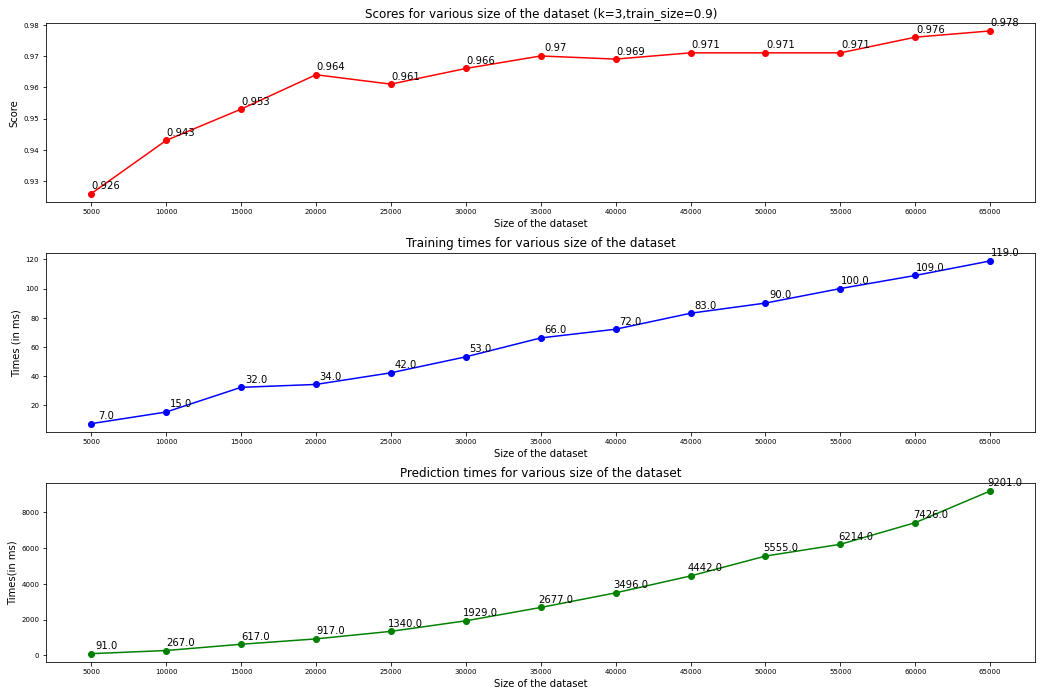

In [107]:
##### x coordinates
x = np.arange(5000,70000,5000)

training_times = [i*1000 for i in training_times]
prediction_times = [i*1000 for i in prediction_times]

### Create plot
fig, figs = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
fig.tight_layout(pad=3.0)
figs[0].plot(x,scores, marker='o', color='r')
figs[1].plot(x,training_times, marker='o', color='b')
figs[2].plot(x,prediction_times, marker='o', color='g')
### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[2].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(scores[i], # this is the text
                 (x[i],scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(training_times[i], # this is the text
                 (x[i],training_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[2].annotate(prediction_times[i], # this is the text
                 (x[i],prediction_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
figs[2].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Scores for various size of the dataset (k=3,train_size=0.9)')
figs[1].title.set_text('Training times for various size of the dataset')
figs[2].title.set_text('Prediction times for various size of the dataset')
figs[0].set_xlabel('Size of the dataset')
figs[1].set_xlabel('Size of the dataset')
figs[2].set_xlabel('Size of the dataset')
figs[0].set_ylabel('Score')
figs[1].set_ylabel('Times (in ms)')
figs[2].set_ylabel('Times(in ms)')

In [ ]:
####### Variation des types de distances utilisées #######

### Create vector of 5000 random indexes
rand_indexes = np.random.randint(70000, size=50000)
### Load data with the previous vector
data = mnist.data[rand_indexes]
# print("Dataset : ", data)
target = mnist.target[rand_indexes]
# print("Etiquettes : ", target)

scores = []
training_times = []
prediction_times = []

### Train the algorithm with various distance types
distances = [1,2,3]
names_distances = ["manhattan","euclidean","minkowski"]

for i in distances:
    print("Computing for d =", names_distances[i-1])
    # Split the dataset
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, target,train_size=0.9)
    
    # Training on xtrain,ytrain
    t1 = round(time.time(),3)
    clf = neighbors.KNeighborsClassifier(n_neighbors=3,p=i)
    print("Fitting...")
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),3)
    
    # Predicting on xtest
    print("Predicting...")
    pred = clf.predict(xtest)
    t3 = round(time.time(),3)
    training_times.append(round(t2-t1,3))
    prediction_times.append(round(t3-t2,3))
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On calcule le score obtenu sur xtest avec les étiquettes ytest
    scores.append(round(clf.score(xtest, ytest),3))

Computing for d = manhattan
Fitting...
Predicting...


names_distances :  ['manhattan', 'euclidean', 'minkowski']
training_times :  [78.0, 92.0]
prediction_times :  [219800.0, 5061.0]


ValueError: x and y must have same first dimension, but have shapes (3,) and (2,)

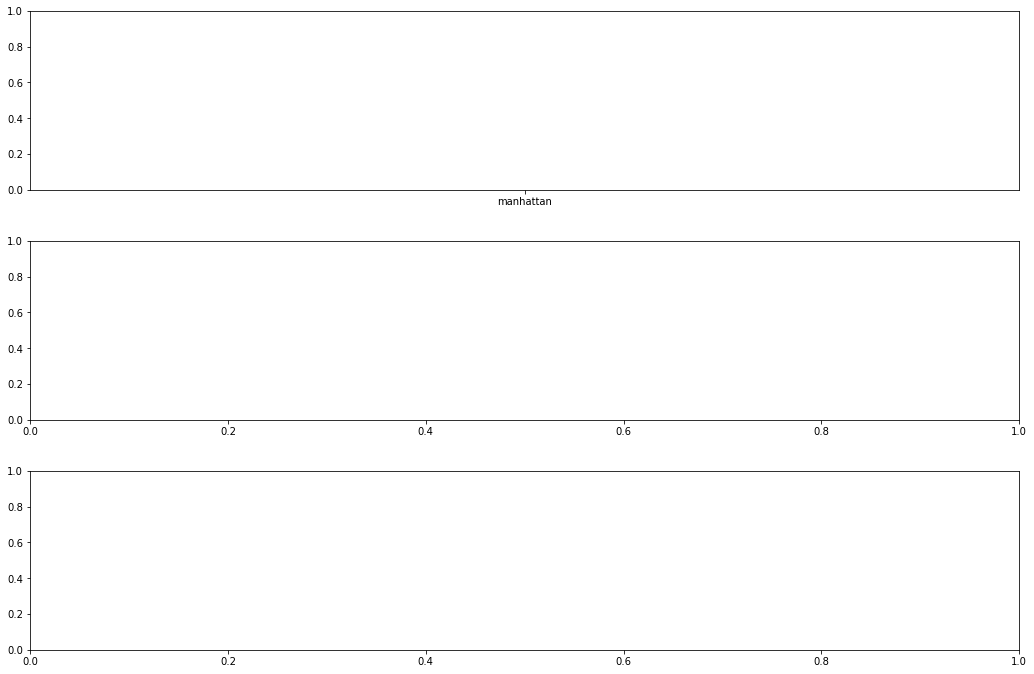

In [101]:
##### x coordinates
x = names_distances
print("names_distances : ", names_distances)
training_times = [i*1000 for i in training_times]
print("training_times : ", training_times)
prediction_times = [i*1000 for i in prediction_times]
print("prediction_times : ", prediction_times)

### Create plot
fig, figs = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
fig.tight_layout(pad=3.0)
figs[0].plot(x,scores, marker='o', color='r')
figs[1].plot(x,training_times, marker='o', color='b')
figs[2].plot(x,prediction_times, marker='o', color='g')
### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[2].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(scores[i], # this is the text
                 (x[i],scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(training_times[i], # this is the text
                 (x[i],training_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[2].annotate(prediction_times[i], # this is the text
                 (x[i],prediction_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
figs[2].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Scores for various distance type (k=3,train_size=0.9,dataset_size=50000)')
figs[1].title.set_text('Training times for various distance type (k=3,train_size=0.9,dataset_size=50000)')
figs[2].title.set_text('Prediction times for various distance type (k=3,train_size=0.9,dataset_size=50000)')
figs[0].set_xlabel('Distance type')
figs[1].set_xlabel('Distance type')
figs[2].set_xlabel('Distance type')
figs[0].set_ylabel('Score')
figs[1].set_ylabel('Times (in ms)')
figs[2].set_ylabel('Times(in ms)')